In [29]:
import pandas as pd
import numpy as np


1\. Perform the following operations on plain `txt` files:

+ create a list of integrer numbers and then save it to a text file named "data_int.txt". Run the `cat` command to print the content of the file.
+ create a matrix of 5x5 floats and then save it to a text file named "data_float.txt". Use the `cat` command to print the content of the file.
+ load the txt file of the previous point and convert it to a csv file by hand.

In [126]:
int_list = np.arange(30).reshape(1,30)
np.savetxt('data_int.txt', int_list , delimiter=',' , fmt='%d')

!type data_int.txt
#!cat data_int.txt


float_matrix = np.arange(0,1,0.04).reshape(5,5)
np.savetxt('data_float.txt', float_matrix  , delimiter=',' , fmt='%1.2f')


!type data_float.txt
#!cat data_float.txt



load_file = pd.read_csv("data_float.txt")
load_file.to_csv('data_float.csv')

0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29
0.00,0.04,0.08,0.12,0.16
0.20,0.24,0.28,0.32,0.36
0.40,0.44,0.48,0.52,0.56
0.60,0.64,0.68,0.72,0.76
0.80,0.84,0.88,0.92,0.96


2\. Load the file *user_data.json*, which can be found at:

- https://www.dropbox.com/s/sz5klcdpckc39hd/user_data.json

and filter the data by the "CreditCardType" when it equals to "American Express". Than save the data to a new CSV file.

In [48]:
import json


user_data = json.load(open('user_data.json'))
df=df[df["CreditCardType"]=="American Express"]
df.to_csv("user_data.csv")

3\. Load the file from this url:

- https://www.dropbox.com/s/kgshemfgk22iy79/mushrooms_categorized.csv

with Pandas. 

+ explore and print the DataFrame
+ calculate, using `groupby()`, the average value of each feature, separately for each class
+ save the file in a JSON format.

In [61]:
df = pd.read_csv('mushrooms_categorized.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,...,2,7,7,0,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,...,2,7,7,0,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,...,2,7,7,0,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,...,2,7,7,0,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,...,2,7,7,0,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,...,2,5,5,0,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,...,2,5,5,0,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,...,2,5,5,0,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,...,1,7,7,0,2,1,0,7,4,2


In [62]:
df_mean = df.groupby('class').mean()
df_mean

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
class,,,,,,,,,,,,,,,,,,,,,
0,3.266160,1.615970,4.581749,0.653992,4.334601,0.954373,0.285171,0.068441,6.622624,0.615970,...,1.798479,6.098859,6.064639,0.0,1.931559,1.125475,3.007605,3.201521,3.283270,1.148289
1,3.436159,2.055158,4.421859,0.159346,3.940756,0.995403,0.028601,0.567926,2.863636,0.514811,...,1.394280,5.512768,5.504597,0.0,2.002043,1.009193,1.522983,4.021450,4.031665,1.895812


In [68]:
df.to_json('mushrooms_class_features.json' , orient='index' , indent=4)

4\. Get the binary file named *credit_card.dat* from this address:

- https://www.dropbox.com/s/8m0syw2tkul3dap/credit_card.dat

and convert the data into the real credit card number, knowing that:
- each line corresponds to a credit card number, which consists of 16 characters (which are numbers in the 0-9 range) divided in 4 blocks, with a whitespace between each block
- each character is written using a 6 bit binary representation (including the whitespace)
- the final 4 bits of each line are a padding used to determine the end of the line, and can be ignored

*Hint*: convert the binary numbers to the decimal representation first, and then use the `chr()` function to convert the latter to a char

In [101]:
with open('credit_card.dat', 'rb') as credits:
    credit_cards = []
    for line in credits:
        if len(line) > 114:     # 16 * 6 + 3 * 6 (16 digit * 6 bit + 3 space * 6 bit)
            d = [chr(int(line[i:i+6],2)) for i in range(0, len(line), 6)]
            credit_cards.append(''.join(d[:18]))

print(credit_cards)


['7648 5673 3775 227', '3257 8247 3354 226', '2722 0001 4011 665', '0661 3063 3742 315', '0432 1608 1462 474', '5827 2027 8785 730', '5774 8528 2087 111', '8140 1210 6352 284', '5764 1133 7301 710', '6456 1737 4126 672', '1228 8631 7382 000', '7051 0160 5374 316', '0618 3587 1630 637', '1545 5454 7444 563', '6735 3116 3202 683', '7287 5011 1547 841', '7033 2607 3328 420', '2568 5244 1874 502', '1684 2253 7570 711', '0672 2576 0575 663', '6332 8353 8787 134', '1813 3361 1175 421', '2477 6450 8840 236', '5512 3505 2563 132', '3083 7882 0621 002', '4521 5148 8045 033', '7563 3654 8713 578', '8324 2664 0476 556', '0565 2504 7168 351', '5107 5507 1767 073', '2462 1821 2448 144', '2788 0638 6861 655', '5851 5873 5474 054', '0670 1004 4013 265', '5874 5506 3048 080', '2805 5401 8462 126', '5083 8406 6310 186', '1076 1445 3013 226', '8440 4804 4844 527', '4758 6141 0686 138', '7586 0675 0315 256', '2544 1258 7432 516', '3474 5023 4434 562', '1410 0270 0434 508', '7315 4446 1104 421', '0224 774

5\. **Optional**: load the remote file:

- https://www.dropbox.com/s/aamg1apjhclecka/regression_generated.csv

with Pandas and create a scatter plot with all possible combinations of the following features:
    
  + features_1
  + features_2
  + features_3

In [112]:
df = pd.read_csv('regression_generated.csv')
df

,label,features_1,features_2,features_3,features_4,features_5,features_6,features_7,features_8,features_9,...,features_11,features_12,features_13,features_14,features_15,features_16,features_17,features_18,features_19,features_20
0,-89.243497,2.175170,-0.285786,-0.603396,-0.627453,-0.686474,0.381067,0.306205,-0.637447,-1.332087,...,1.290725,1.047483,-1.055467,0.853204,0.038665,-0.752959,0.577920,-0.657400,1.367308,0.570199
1,230.050125,1.481941,-1.327870,-0.543583,-0.303578,1.552964,0.549738,-0.763094,-0.455796,2.053388,...,-1.761306,-0.934284,-1.050999,0.444026,-0.037959,1.061624,-1.569870,2.410696,1.113594,2.329479
2,-286.844411,-1.154394,-0.178649,-1.636646,0.239353,-0.684994,0.587201,-0.209564,-0.428956,-0.757998,...,0.374645,-1.702189,-0.014514,-0.711557,-0.558523,-1.204526,0.234989,0.398384,-0.236555,0.642003
3,364.552862,0.197665,1.455707,1.562205,2.168207,0.053335,0.790492,-0.212023,-1.142483,-1.124906,...,0.712160,-2.844936,0.483994,-0.694294,1.349605,-1.303414,0.161987,0.754084,1.248258,-1.466045
4,515.460006,0.596676,0.969860,1.294158,-0.404728,2.145297,0.997481,-0.541670,-0.952850,-0.592084,...,-1.347072,0.243422,0.290336,0.798331,0.876428,-0.366807,-0.119534,0.892320,-0.806912,0.736080
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,-328.100239,-1.820929,1.358539,-2.494838,0.828299,0.199255,0.142303,-0.582563,0.472356,-1.411304,...,-1.062502,2.299985,-0.085065,0.357165,-1.400150,-0.976176,-0.796009,-0.148662,0.978054,-0.804272
1996,-62.960036,-0.883712,-0.063687,-0.418704,-0.872601,0.363769,-0.368570,-0.104321,-2.493615,-1.694770,...,-0.197659,-0.533637,-0.598431,-0.039737,1.882953,-1.837356,0.583887,0.603931,-0.356482,0.029355
1997,-90.262252,-0.021394,-0.312864,-0.730848,-1.341482,-0.720862,-0.683872,-0.805370,-0.521334,-0.074645,...,1.899276,0.417949,0.324229,0.448252,-0.282110,-2.320763,1.484126,0.392324,-1.116838,-0.459027
1998,-74.333901,-0.041909,-0.862731,-1.232011,1.268843,0.093043,1.684069,0.753851,-0.537096,-0.971790,...,1.401321,-0.933149,-0.166864,1.152448,1.605114,-1.339651,0.105628,0.676177,-0.035598,-1.329490


<AxesSubplot:xlabel='features_2', ylabel='features_3'>

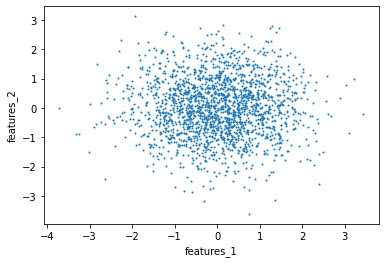

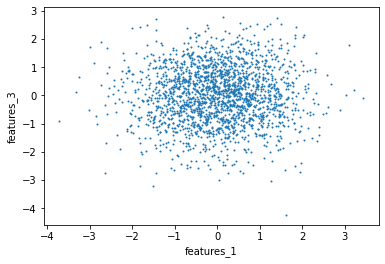

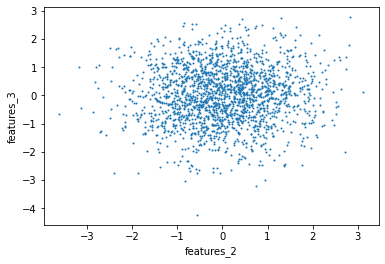

In [116]:
df.plot.scatter('features_1', 'features_2' , s=1)
df.plot.scatter('features_1', 'features_3' , s=1)
df.plot.scatter('features_2', 'features_3' , s=1)